In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['signal','Density']

In [5]:
df.head()

,signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='signal', ylabel='Density'>

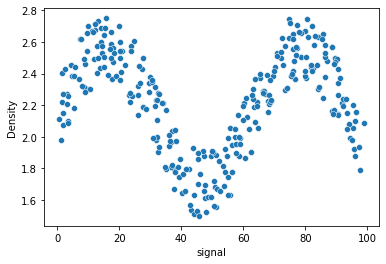

In [6]:
sns.scatterplot(x='signal',y='Density',data=df)

In [7]:
X=df['signal'].values.reshape(-1,1)
y=df['Density']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr_model=LinearRegression()

In [12]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
lr_preds=lr_model.predict(X_test)

In [14]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [17]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

The linear model seems performing pretty well on average but thats the problem. from the plot above we can see that we are trying to fit a model to a datasets having curves. Here MSE and MAE gives a wrong idea. Also the lr_preds all gave a value of 2.22 which means out linear model line fits like an averge line.

# Polynomial Regression Test

In [20]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae= mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    #plotting
    
    signal_range=np.arange(0,100)
    signal_preds=model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='signal',y='Density',data=df,color='brown')
    plt.plot(signal_range,signal_preds)

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [28]:
pipe=make_pipeline(PolynomialFeatures(degree=5),LinearRegression())

MAE: 0.11864311859717545
RMSE: 0.1445281304687178


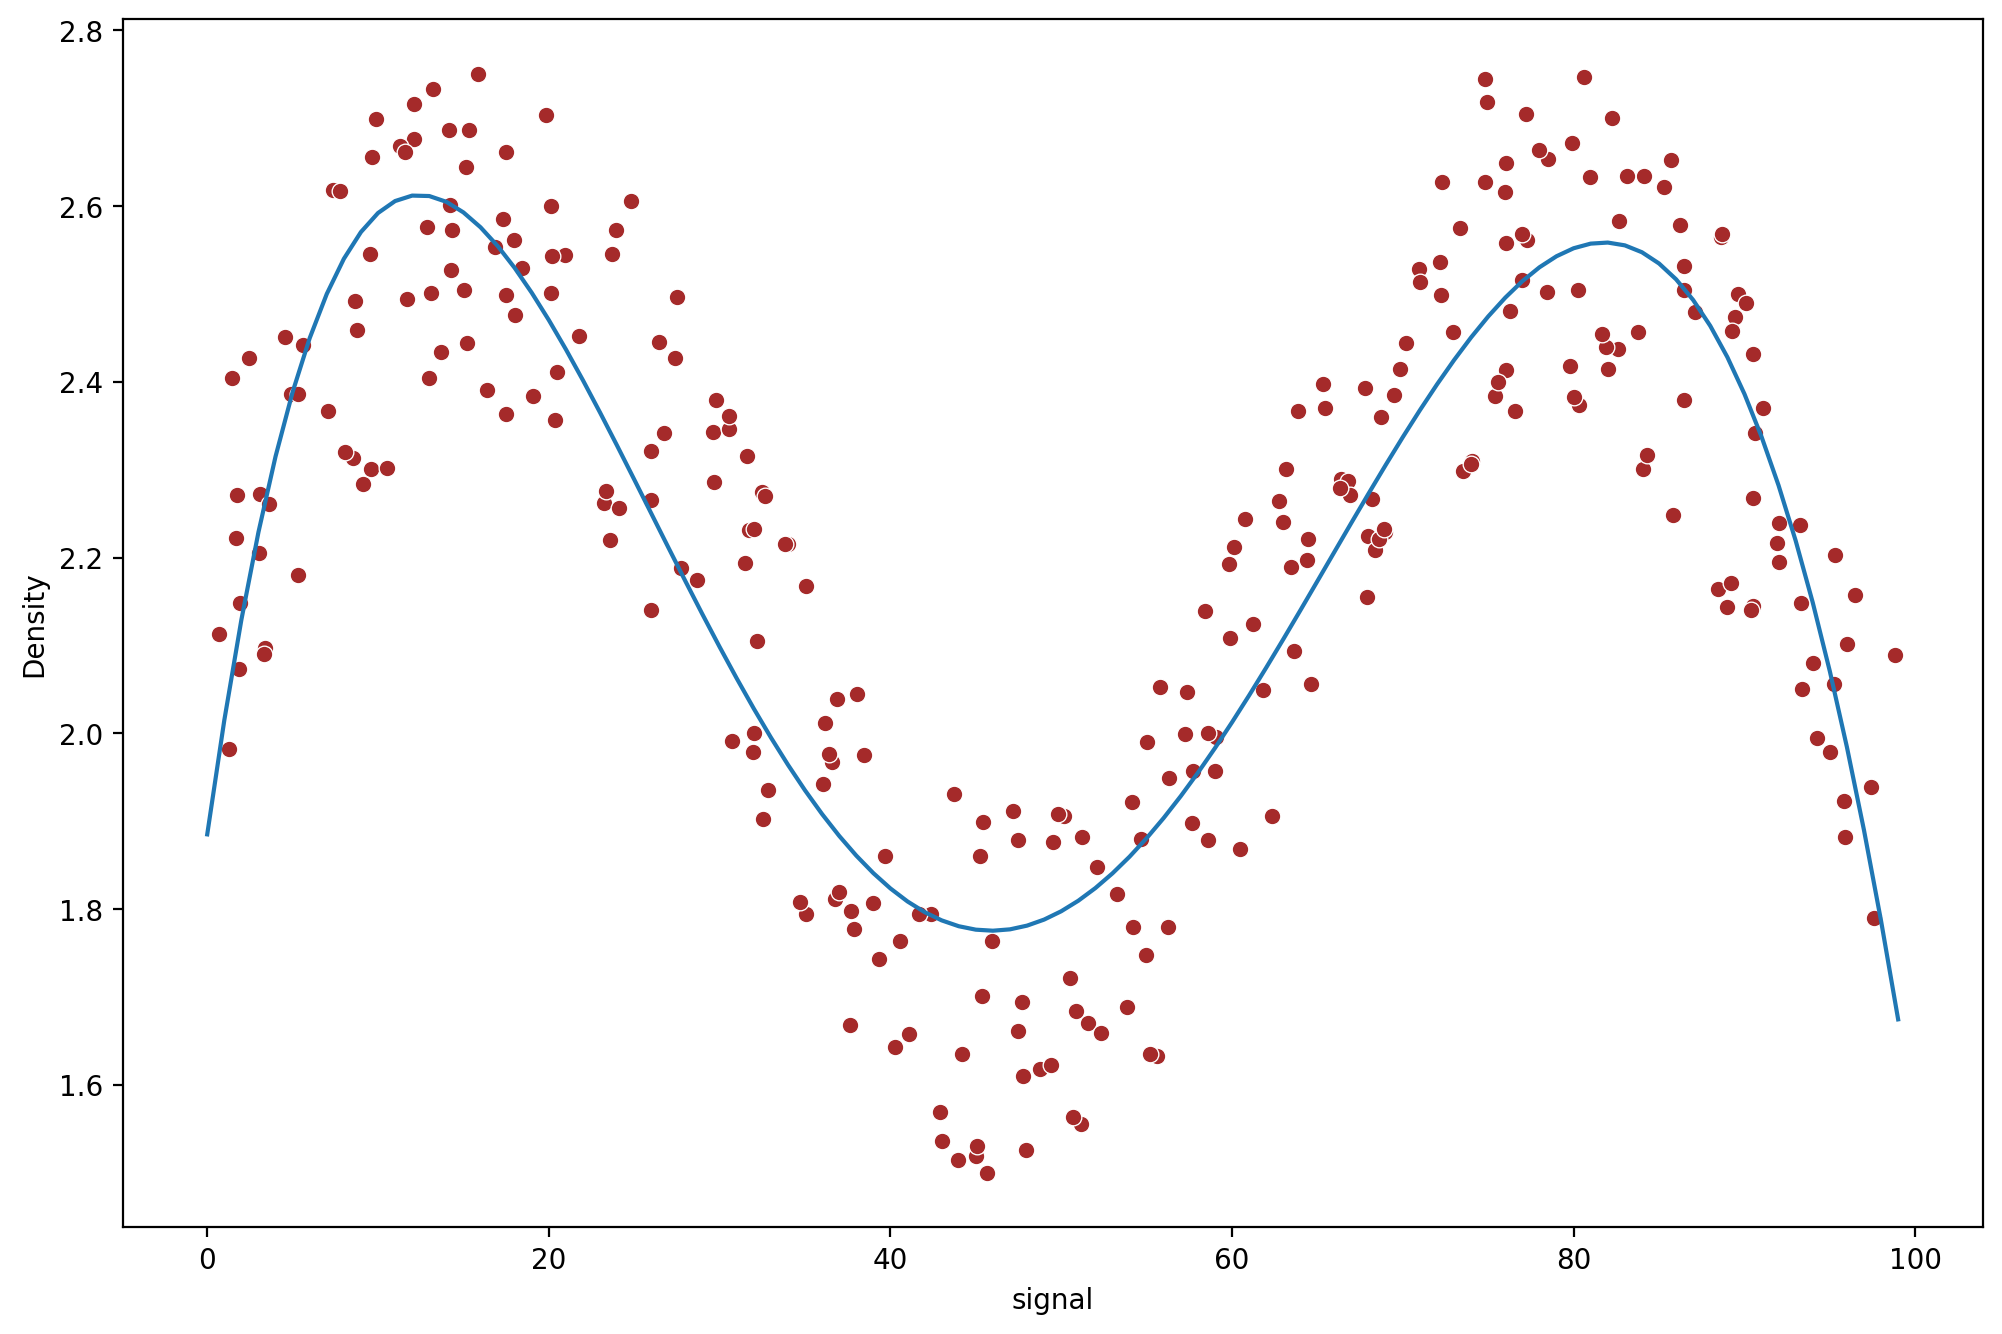

In [29]:
run_model(pipe,X_train,y_train,X_test,y_test)

# KNN

In [31]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926


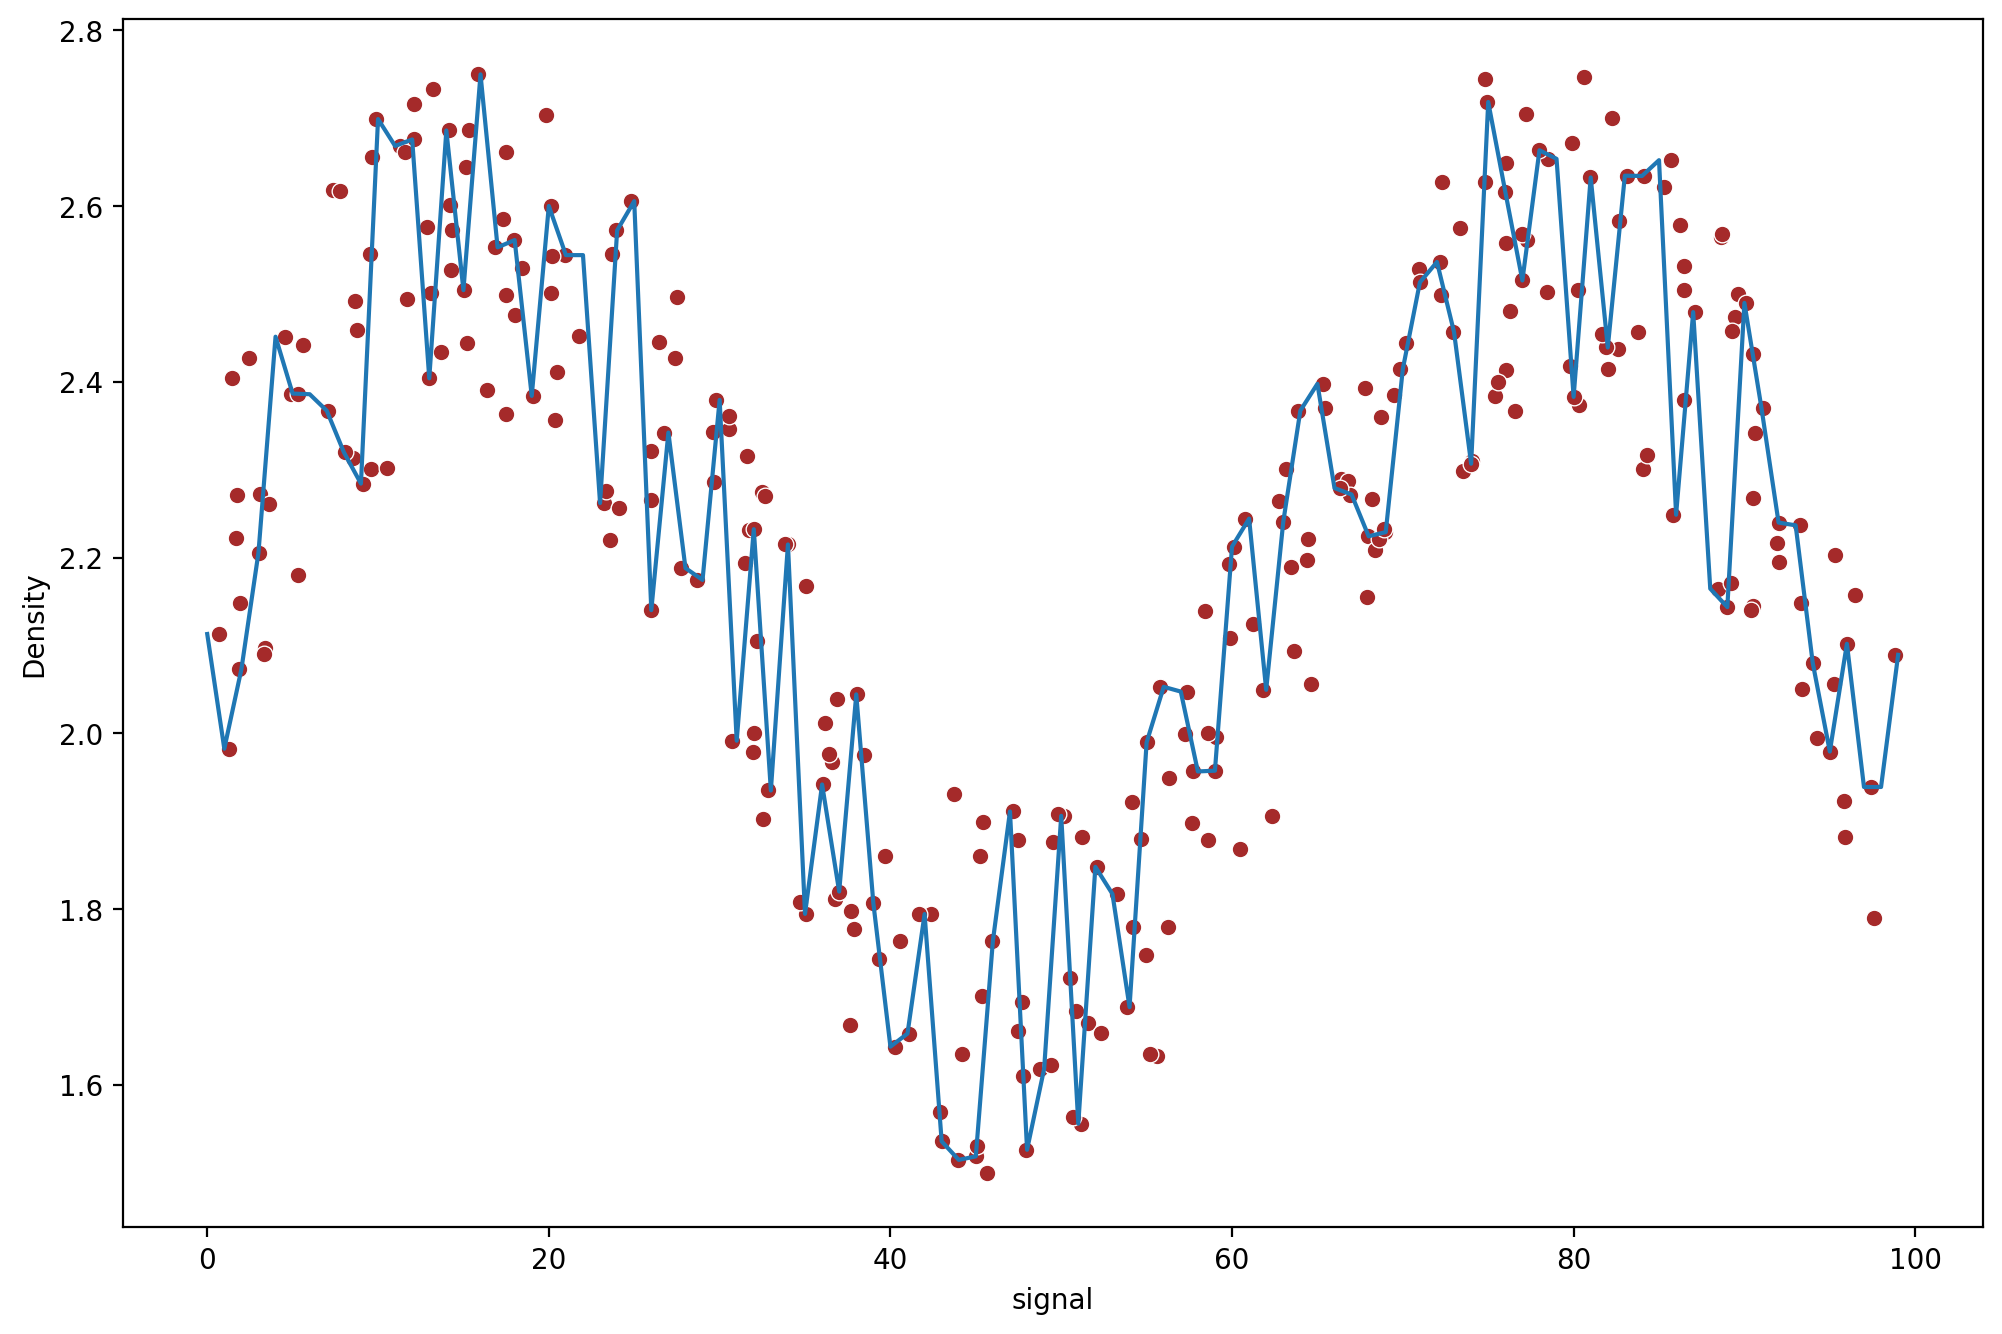

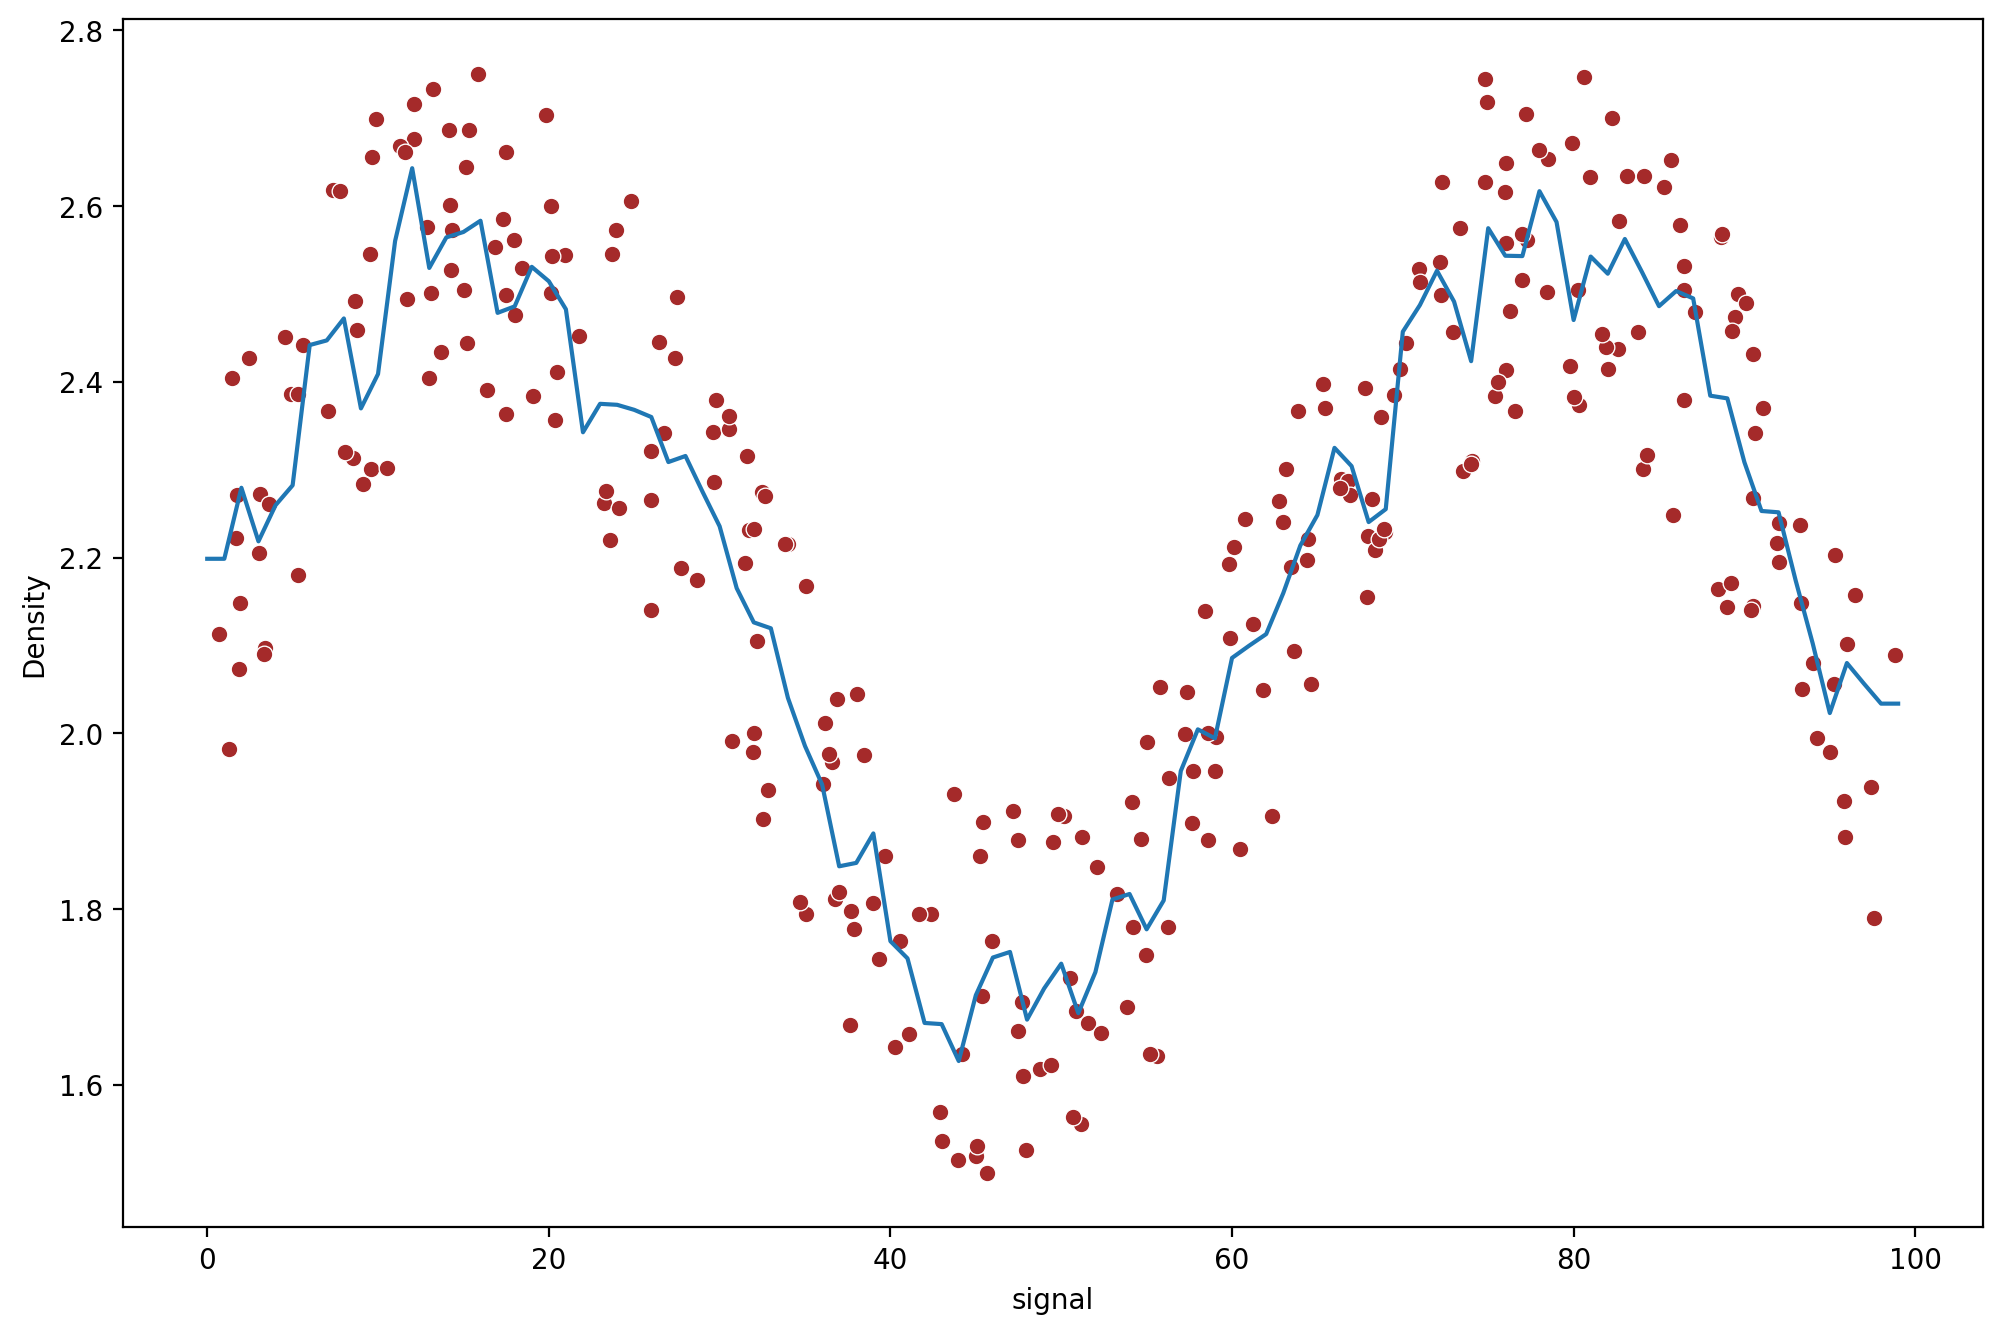

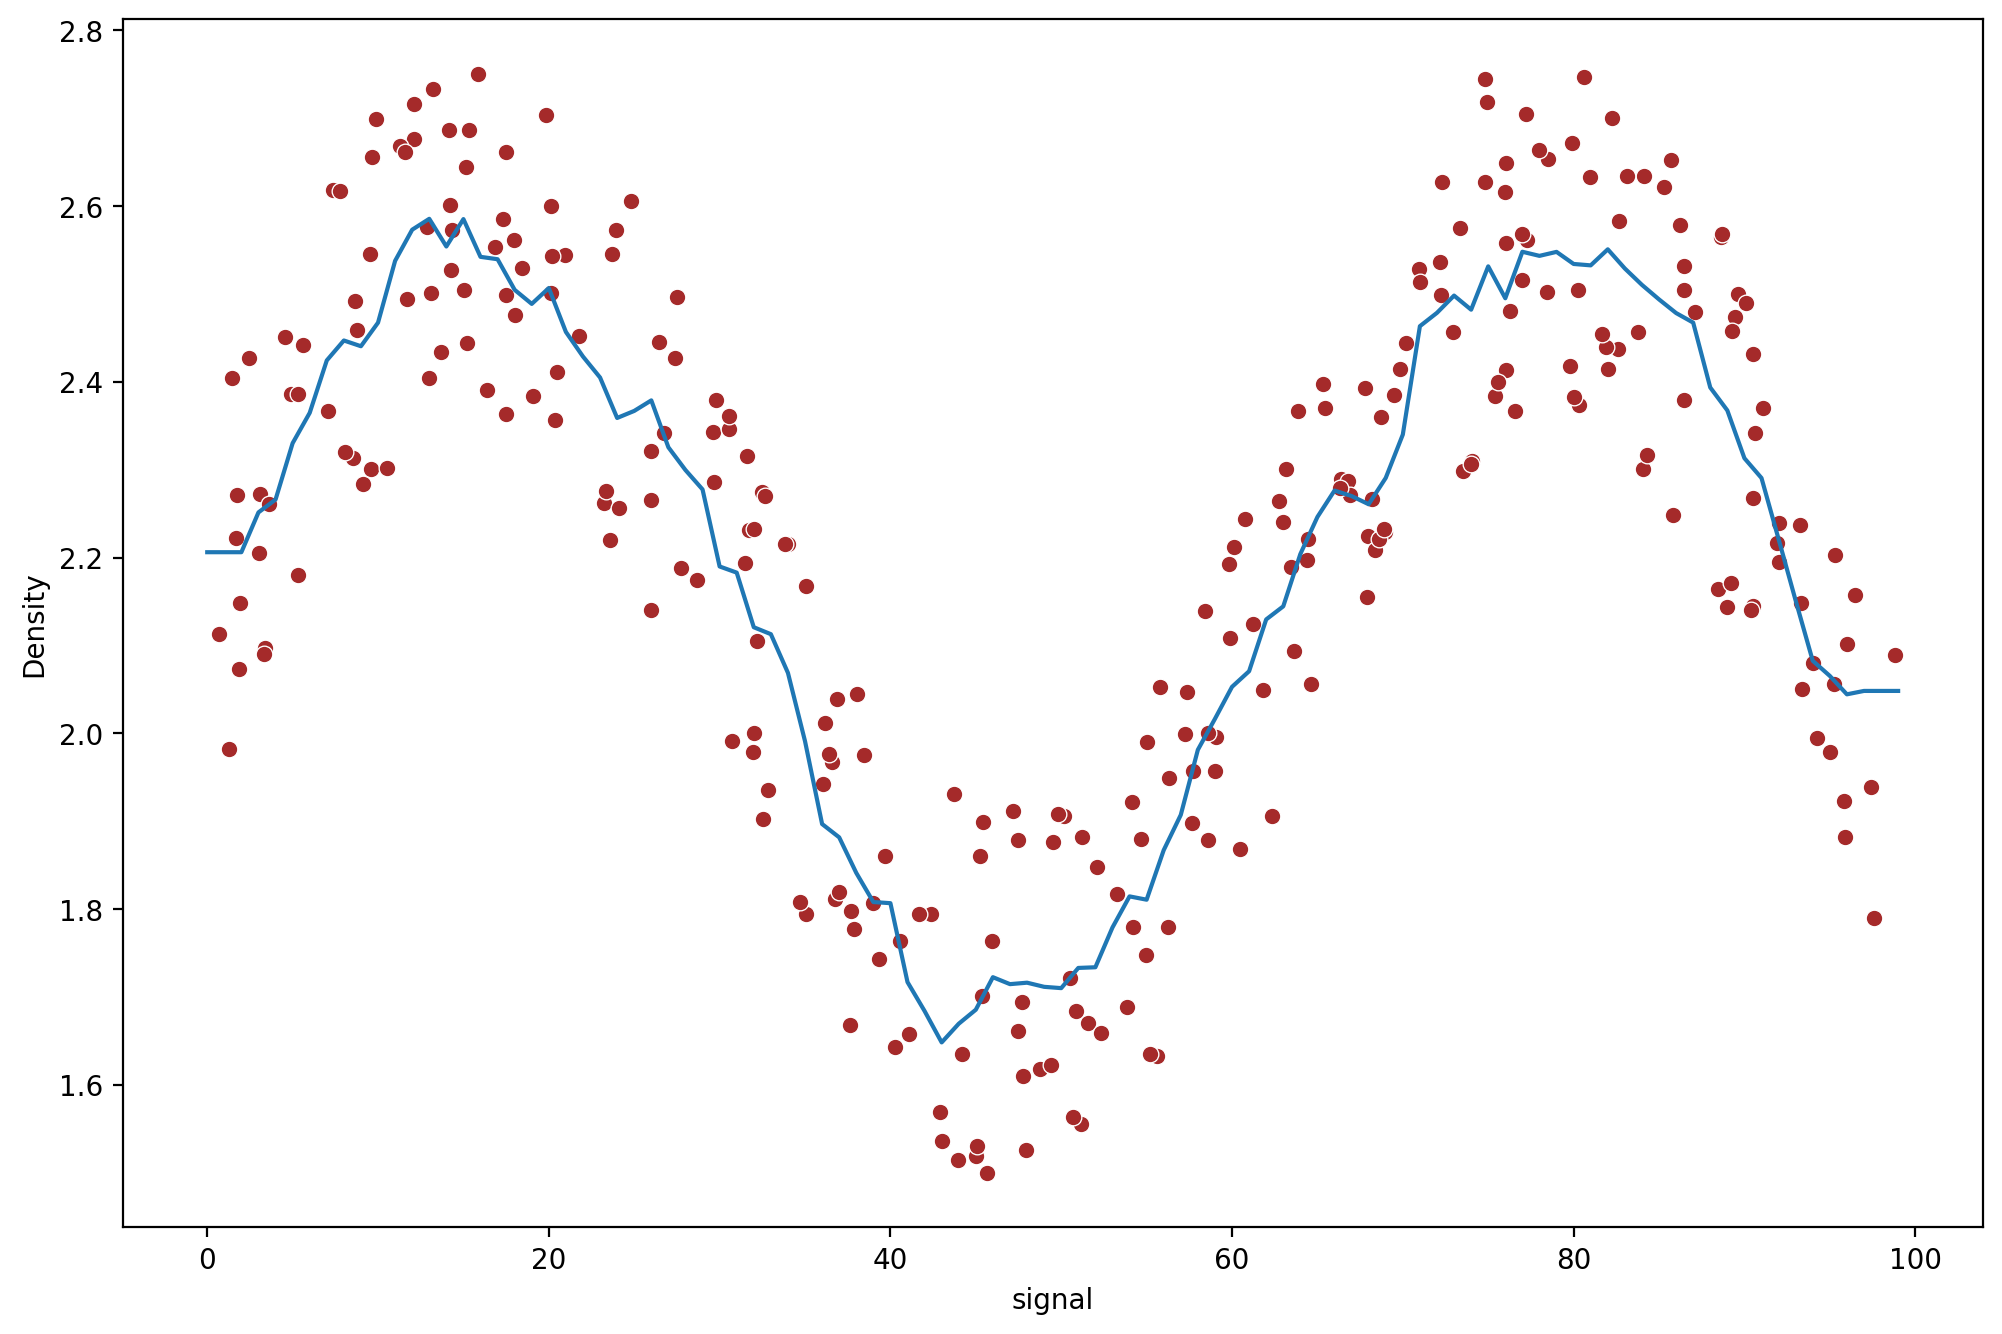

In [32]:
k_values=[1,5,10]

for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

# Decision Tree

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


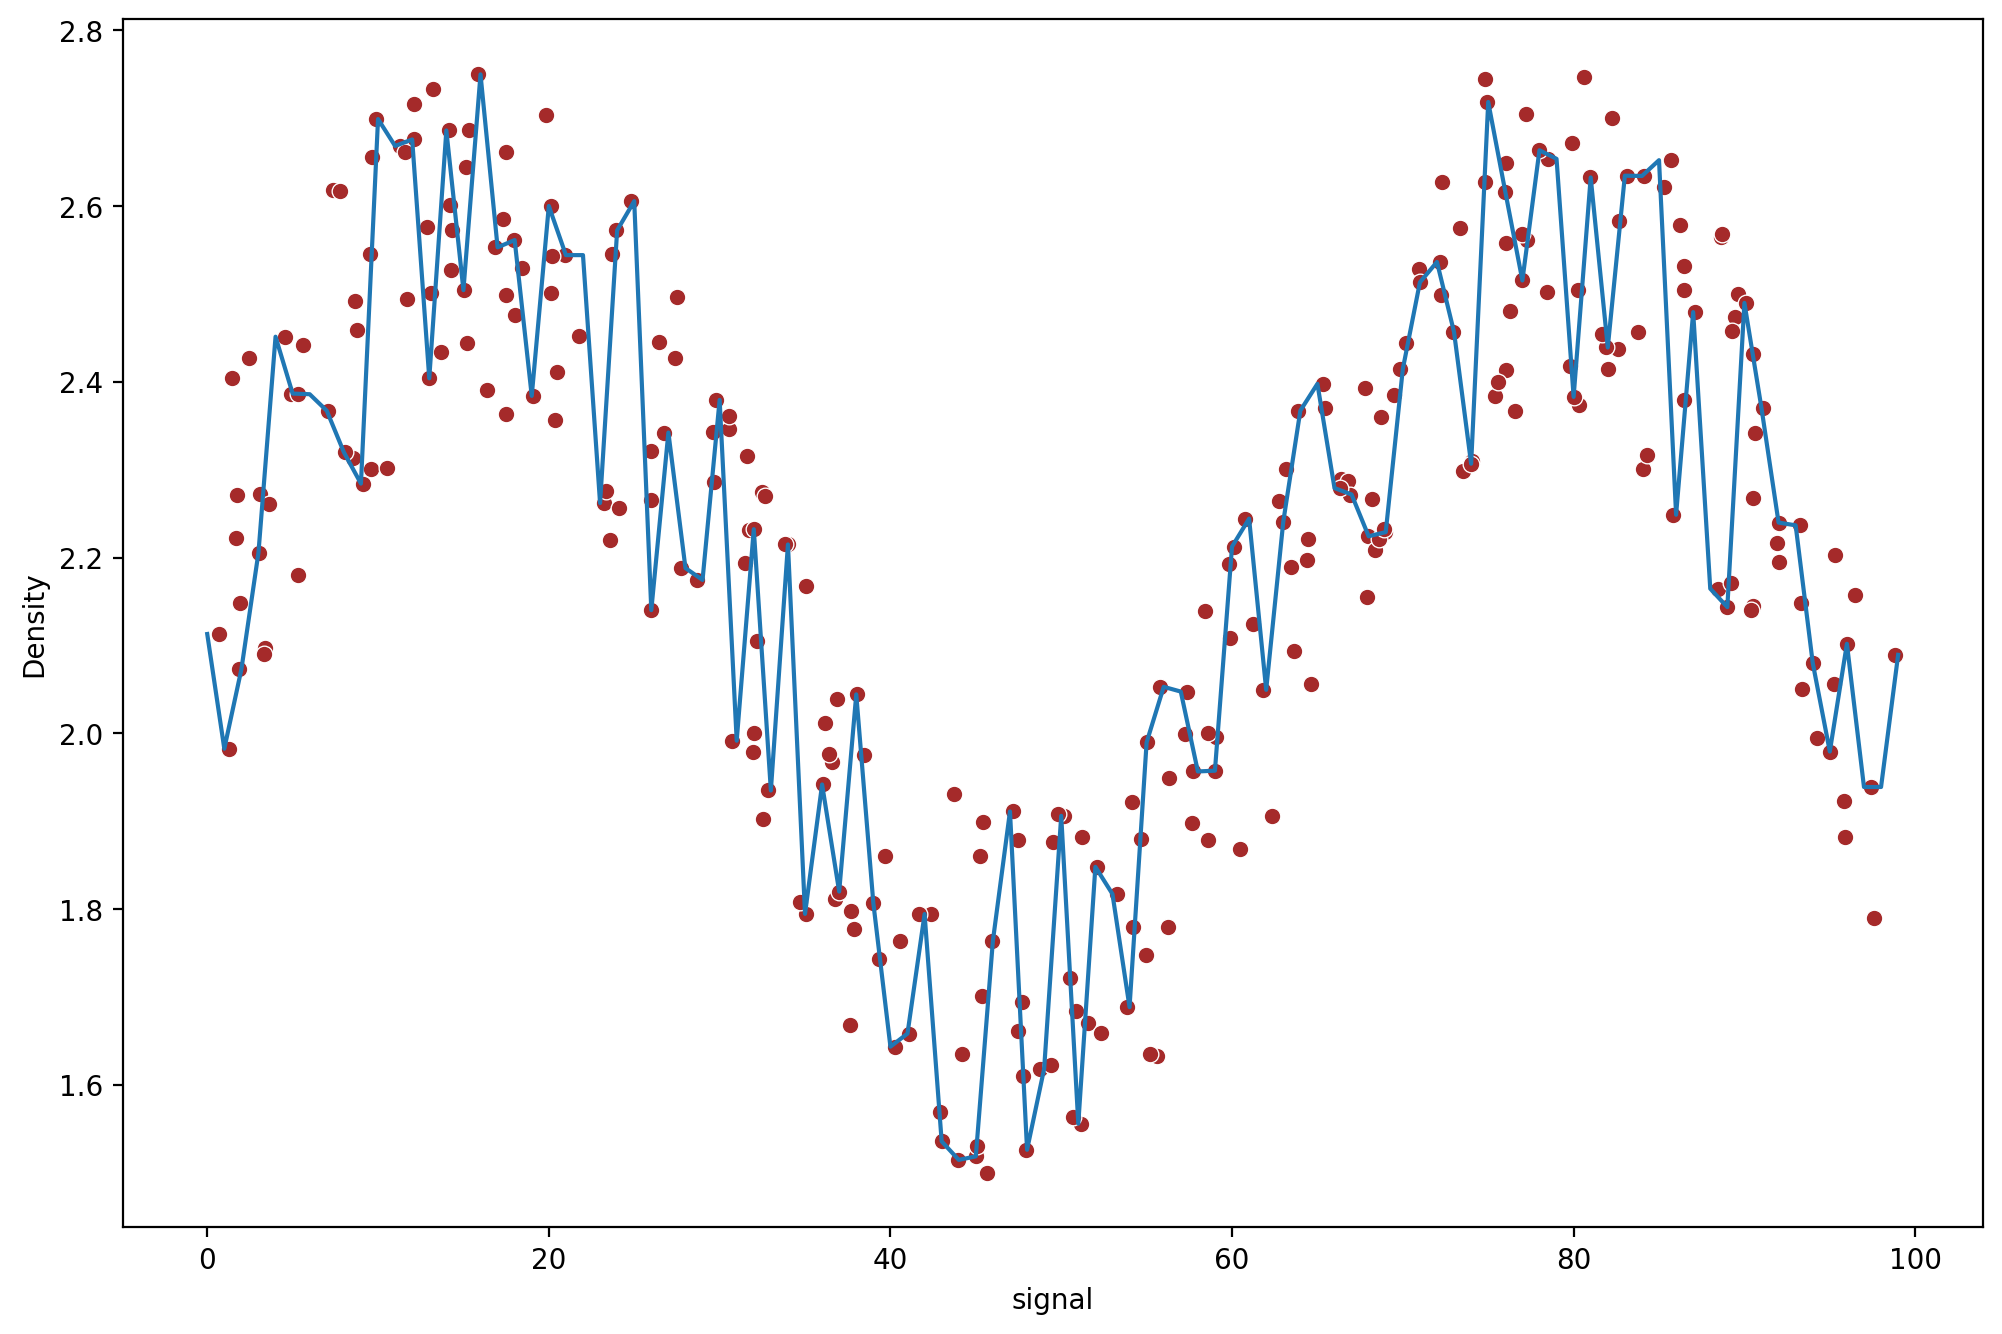

In [33]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

# SVR

In [34]:
from sklearn.svm import SVR

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
svr=SVR()
param_grid={'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
grid=GridSearchCV(svr,param_grid)

MAE: 0.10854210121349125
RMSE: 0.12646999302047557


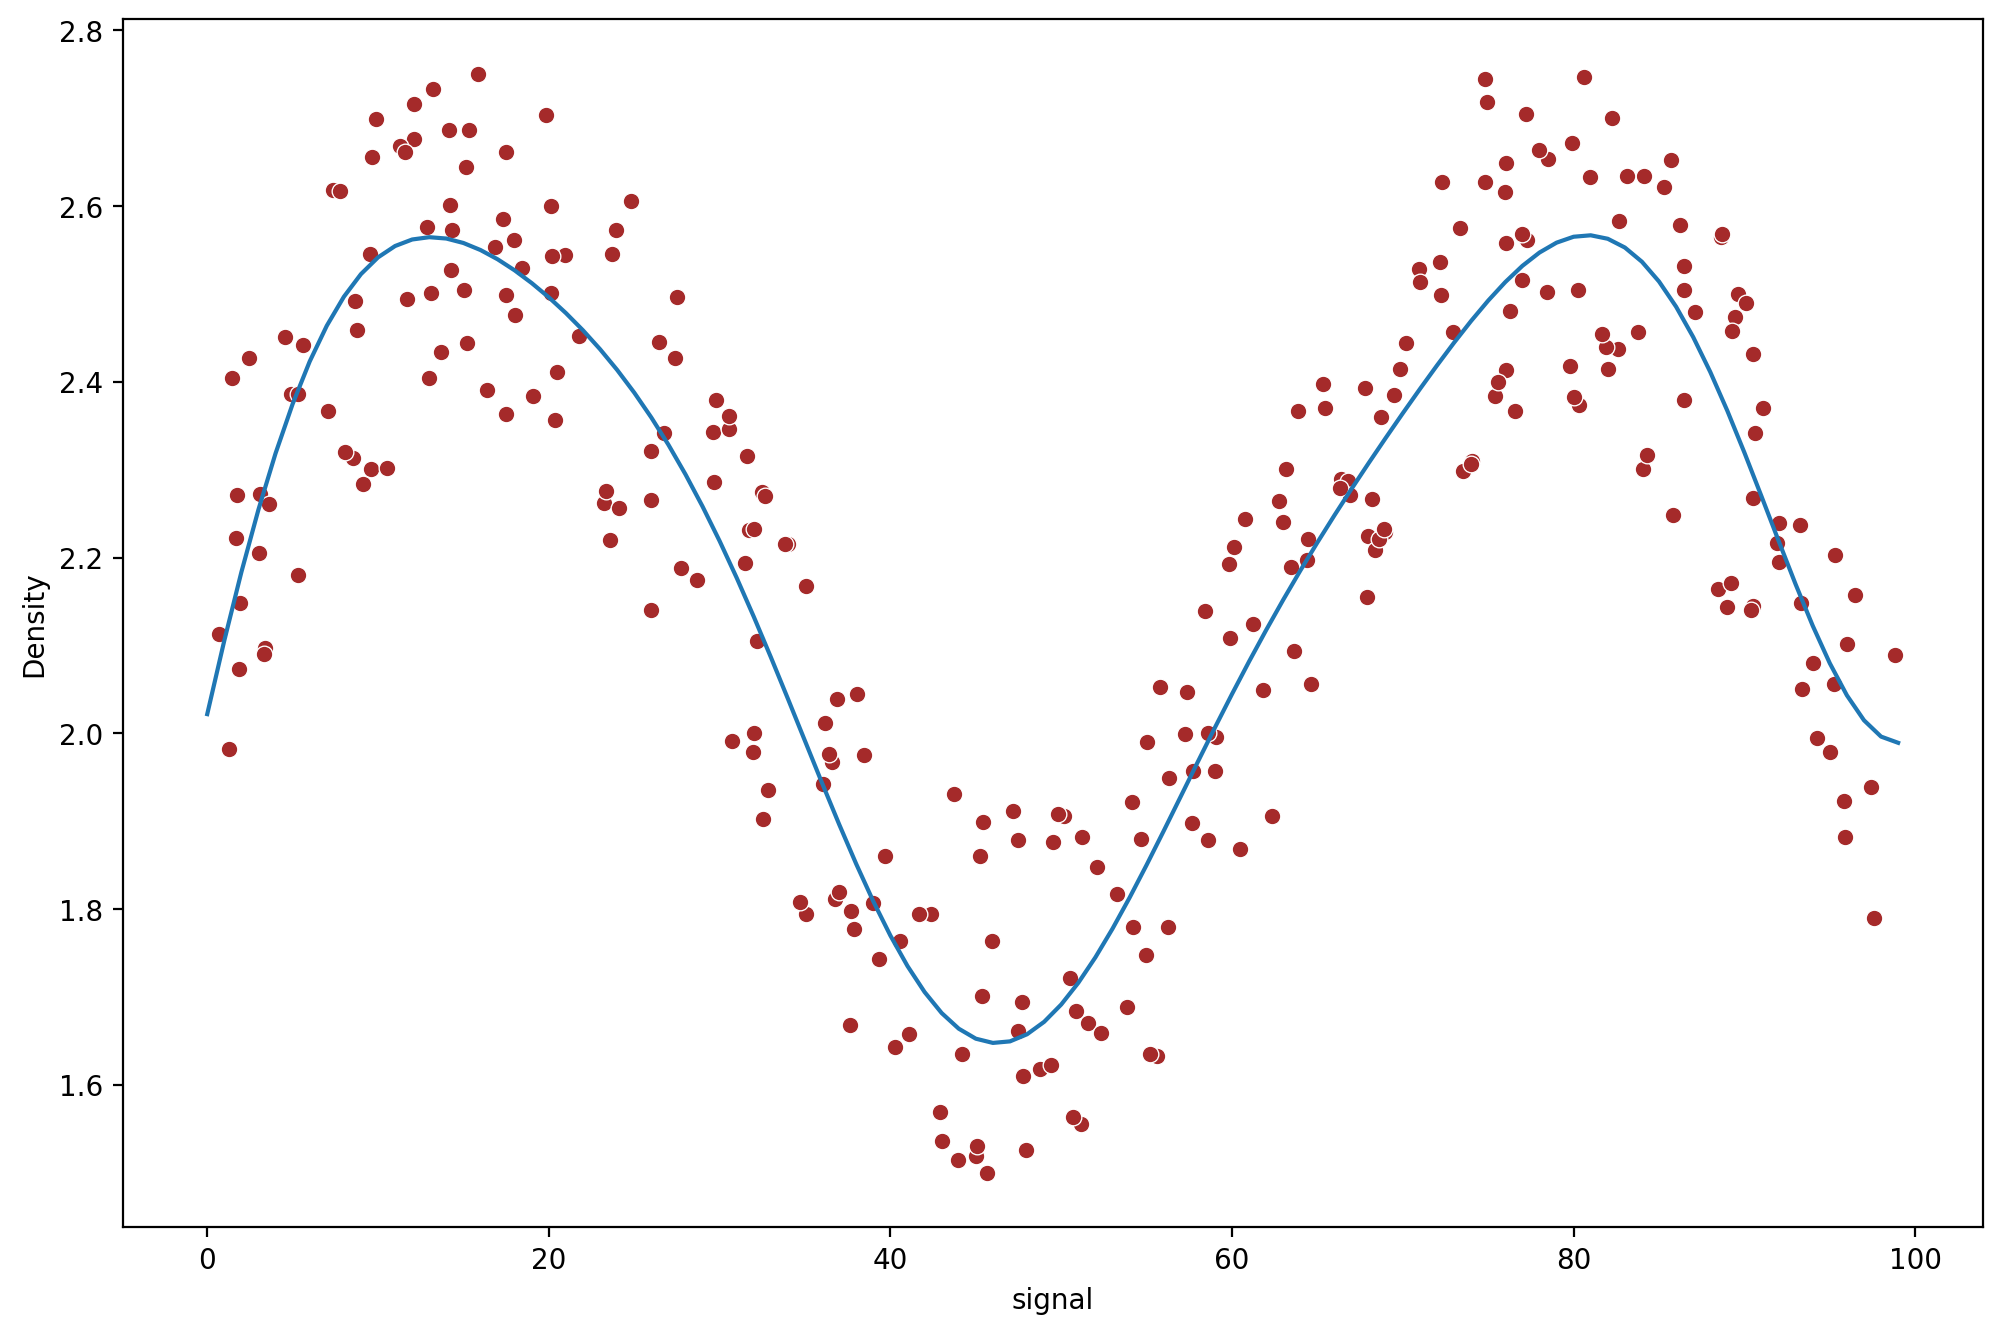

In [37]:
run_model(grid,X_train,y_train,X_test,y_test)

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rfr= RandomForestRegressor(n_estimators=10)

MAE: 0.10687916340154893
RMSE: 0.13370231346630262


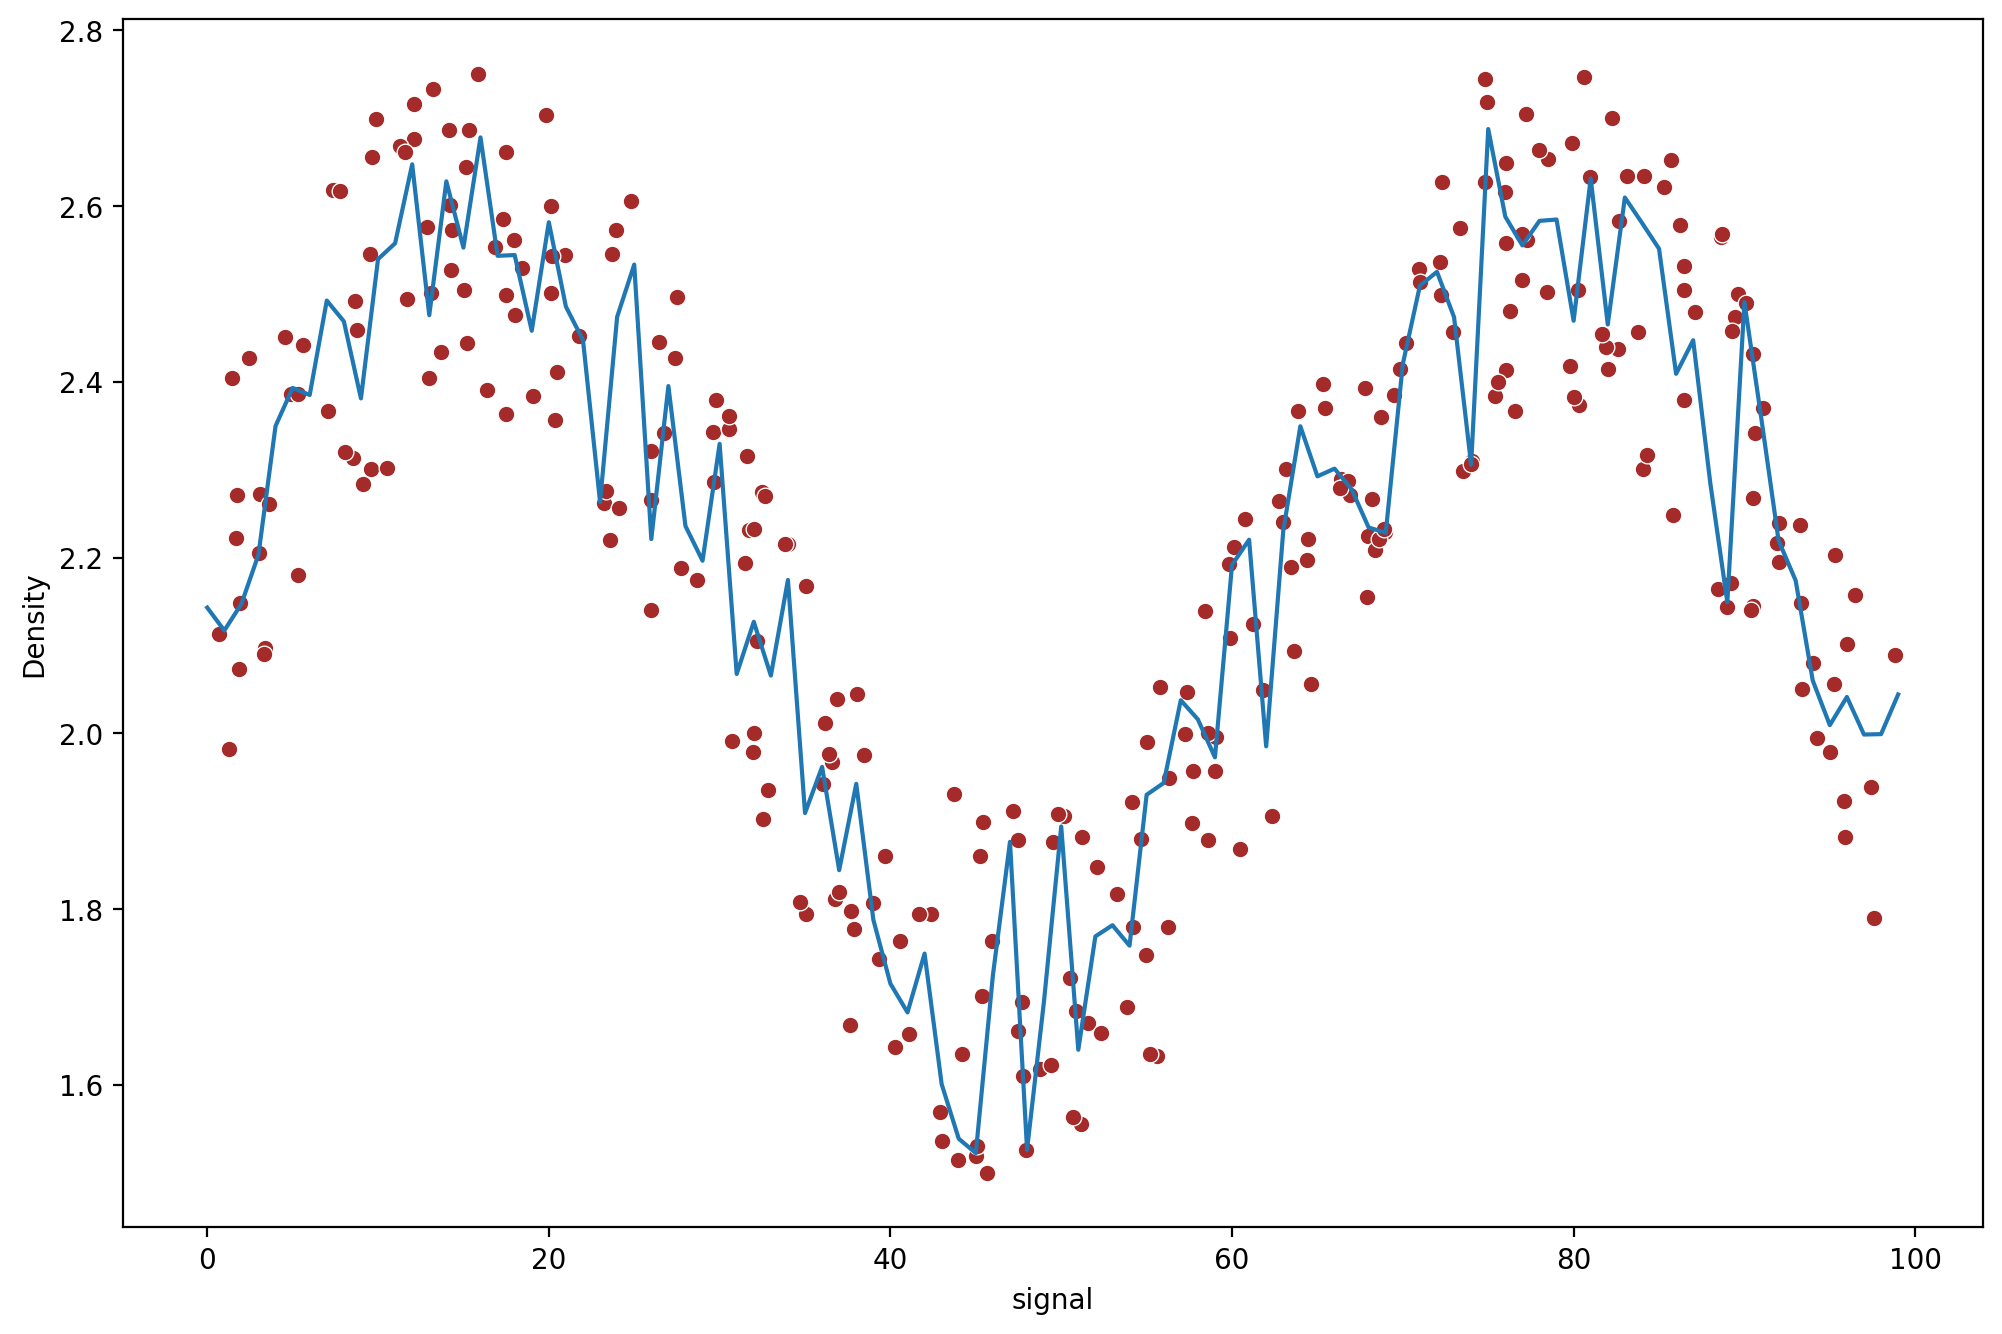

In [40]:
run_model(rfr,X_train,y_train,X_test,y_test)